# **Diabetes Prediction Notebook using KNN Approach**


## *By Paulinus Jua*

In [155]:
!pip install opendatasets

### Import other necessary libraries

In [156]:
import pandas as pd
import pylab as pl
import numpy as np
import opendatasets as od
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [157]:
od.download("https://www.kaggle.com/uciml/pima-indians-diabetes-database/download")

Skipping, found downloaded files in "./pima-indians-diabetes-database" (use force=True to force download)


### reading the dataset using pandas

In [158]:
data = pd.read_csv("diabetes.csv")
# take a look at the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

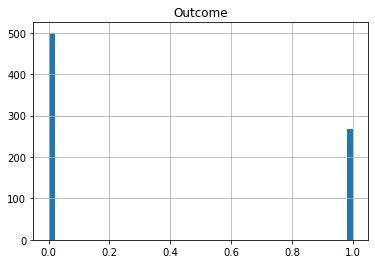

In [159]:
data.hist(column='Outcome', bins=50)

### lets define our X and Y variables

In [160]:

X = np.asarray(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction' , 'Age']])
X[0:5]

y = np.asarray(data['Outcome'])
y [0:5]

array([1, 0, 1, 0, 1])

In [161]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.64,  0.85,  0.15,  0.91, -0.69,  0.2 ,  0.47,  1.43],
       [-0.84, -1.12, -0.16,  0.53, -0.69, -0.68, -0.37, -0.19],
       [ 1.23,  1.94, -0.26, -1.29, -0.69, -1.1 ,  0.6 , -0.11],
       [-0.84, -1.  , -0.16,  0.15,  0.12, -0.49, -0.92, -1.04],
       [-1.14,  0.5 , -1.5 ,  0.91,  0.77,  1.41,  5.48, -0.02]])

### Normalize Data

In [162]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.64,  0.85,  0.15,  0.91, -0.69,  0.2 ,  0.47,  1.43],
       [-0.84, -1.12, -0.16,  0.53, -0.69, -0.68, -0.37, -0.19],
       [ 1.23,  1.94, -0.26, -1.29, -0.69, -1.1 ,  0.6 , -0.11],
       [-0.84, -1.  , -0.16,  0.15,  0.12, -0.49, -0.92, -1.04],
       [-1.14,  0.5 , -1.5 ,  0.91,  0.77,  1.41,  5.48, -0.02]])

### Splitting out data into train and test data

In [163]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


### Modeling our KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier

### Using our test data

In [165]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [166]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 0, 0, 1, 0])

## Evaluation of Model

In [167]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8224755700325733
Test set Accuracy:  0.7402597402597403


### Confusion Matrix

In [168]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7 , 0.71, 0.75, 0.74, 0.74, 0.72, 0.76, 0.75, 0.75])

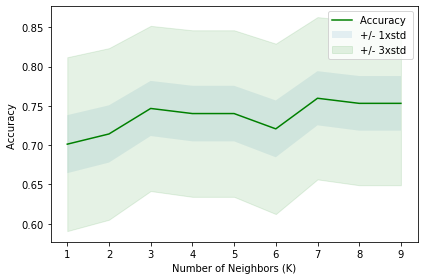

In [169]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [170]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7597402597402597 with k= 7
